<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/cnn%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your image directories for healthy and ill samples
normal_path = "/content/drive/MyDrive/newmodidata/Y2022Ankle/normal"
ill_path = "/content/drive/MyDrive/newmodidata/Y2022Ankle/ill"

# Create lists to store image data and labels
dataset_images = []
dataset_labels = []


In [35]:
# Reading images from the normal directory
for files in os.listdir(normal_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(normal_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(0)  # Label for healthy images

# Reading images from the ill directory
for files in os.listdir(ill_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(ill_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # Define the size for resizing images
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(1)  # Label for ill images
# Create dictionaries to store results
parameters = {}
accuracies = {}
variances = {}
confusion_matrices = {}
classification_reports = {}

print(len(dataset_images))

178


In [36]:
# Convert the lists to NumPy arrays
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

# Normalize pixel values to the range [0, 1]
dataset_images = dataset_images / 255.0

seed = 42  # You can use any integer value as the seed

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset_images, dataset_labels, test_size=0.1, random_state=seed)

In [37]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model on the training dataset
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Extract features from the CNN model for both training and testing datasets
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

Epoch 1/10
5/5 [==============================] - 20s 4s/step - loss: 1.0207 - accuracy: 0.5063 - val_loss: 0.7325 - val_accuracy: 0.4444
Epoch 2/10
5/5 [==============================] - 20s 4s/step - loss: 0.7755 - accuracy: 0.6000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 18s 4s/step - loss: 0.6622 - accuracy: 0.6313 - val_loss: 0.7038 - val_accuracy: 0.6111
Epoch 4/10
5/5 [==============================] - 18s 4s/step - loss: 0.6880 - accuracy: 0.6438 - val_loss: 0.6603 - val_accuracy: 0.6111
Epoch 5/10
5/5 [==============================] - 19s 4s/step - loss: 0.6022 - accuracy: 0.6687 - val_loss: 0.6570 - val_accuracy: 0.6111
Epoch 6/10
5/5 [==============================] - 20s 4s/step - loss: 0.5999 - accuracy: 0.6938 - val_loss: 0.6410 - val_accuracy: 0.7222
Epoch 7/10
5/5 [==============================] - 18s 4s/step - loss: 0.6007 - accuracy: 0.6625 - val_loss: 0.6649 - val_accuracy: 0.6111
Epoch 8/10
5/5 [==================

Classification Report for SVM on the testing dataset:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.86      0.67      0.75         9

    accuracy                           0.78        18
   macro avg       0.79      0.78      0.77        18
weighted avg       0.79      0.78      0.77        18



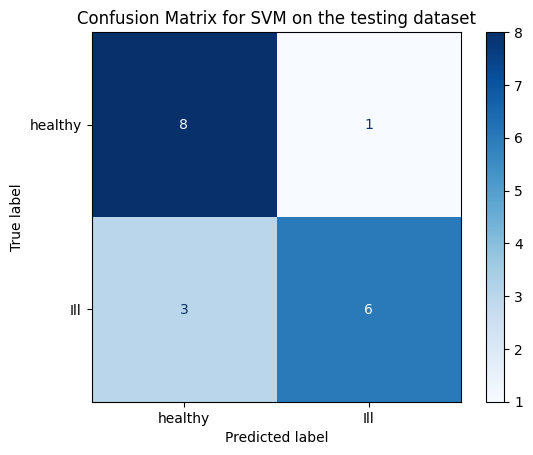

In [40]:
# Create and train the SVM classifier on the extracted features
svm_classifier = SVC()
svm_classifier.fit(X_train_features, y_train)

# Predict on the testing dataset
y_test_pred = svm_classifier.predict(X_test_features)

# Generate classification report for the testing dataset
test_report = classification_report(y_test, y_test_pred)
print("Classification Report for SVM on the testing dataset:\n", test_report)

# Calculate the confusion matrix for the testing dataset
test_cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix for the testing dataset
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["healthy", "Ill"])
test_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the testing dataset")
plt.show()

Classification Report for SVM on the training dataset:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        97
           1       0.90      0.73      0.81        63

    accuracy                           0.86       160
   macro avg       0.87      0.84      0.85       160
weighted avg       0.87      0.86      0.86       160



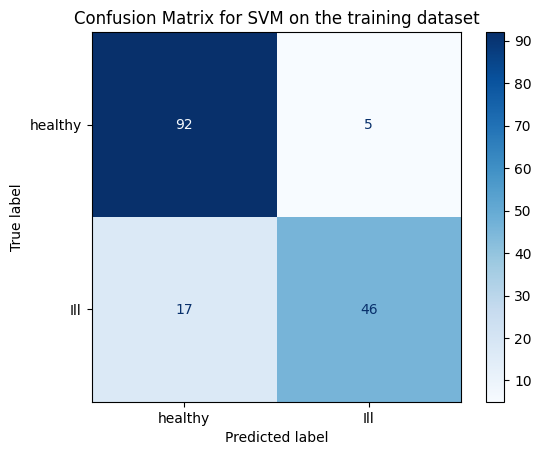

In [39]:
# Create and train the SVM classifier on the extracted features
svm_classifier = SVC()
svm_classifier.fit(X_train_features, y_train)

# Predict on the training dataset
y_train_pred = svm_classifier.predict(X_train_features)

# Generate classification report for the training dataset
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for SVM on the training dataset:\n", train_report)

# Calculate the confusion matrix for the training dataset
train_cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix for the training dataset
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["healthy", "Ill"])
train_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on the training dataset")
plt.show()
